In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [3]:
df=pd.read_csv('/content/hotel_bookings.csv')
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0.0,1.0,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0.0,1.0,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0.0,0.0,Canceled,2015-04-22


##Data Cleaning/Preprocessing

Checking for Null Values

In [4]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [5]:
#Drop company column because there are too many null values
df.drop(['company'], axis=1, inplace=True)

In [6]:
#Drop rows that have missing Country data. We don't want to delete the whole column becasue there aren't a lot of null values and it's an important variable.
df.dropna(subset=['country'],inplace=True)

In [7]:
#Similar to previous cell
df.dropna(subset=['country'],inplace=True)
df.dropna(subset=['children'],inplace=True)

In [8]:
#There aren't a ton of null values for agent but we can delete it because we won't be using this variable in the analysis anyways.
df.drop(['agent'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Check for Duplicate Data

In [10]:
df.duplicated().sum()

21298

In [11]:
#Drop Duplciates
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

Check and Change Data Types

In [12]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [13]:
#Changing children column to int
df['children']=df['children'].astype('int64')

adding useful columns

In [14]:
#add total family size column and total stay column
df['total_family_size']=df['adults']+df['children']+df['babies']
df['total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_family_size,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74034,City Hotel,1,307,2015,August,34,20,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2
74054,City Hotel,1,314,2015,August,35,27,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2
74074,City Hotel,1,321,2015,September,36,3,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2
74094,City Hotel,1,328,2015,September,37,10,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2


##Exploratory Analysis
Busiest Months by Hotel Type

Text(0.5, 1.0, 'Busiest Months by Hotel Type')

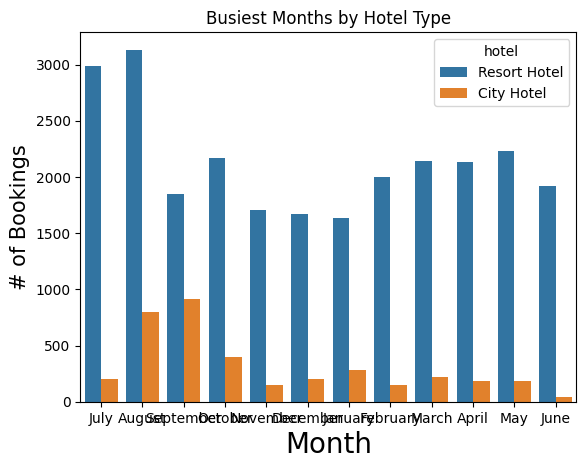

In [15]:
sns.countplot(x ='arrival_date_month',hue='hotel', data = df[(df['is_canceled'] == 0)])
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Month', fontsize=20)
plt.ylabel('# of Bookings', fontsize=15)
plt.title("Busiest Months by Hotel Type")

Insights: Both hotels follow a similar pattern of being busier in the summer months. Also, the city hotel is busier than the resort hotel.

Most Frequent origins of customers

''

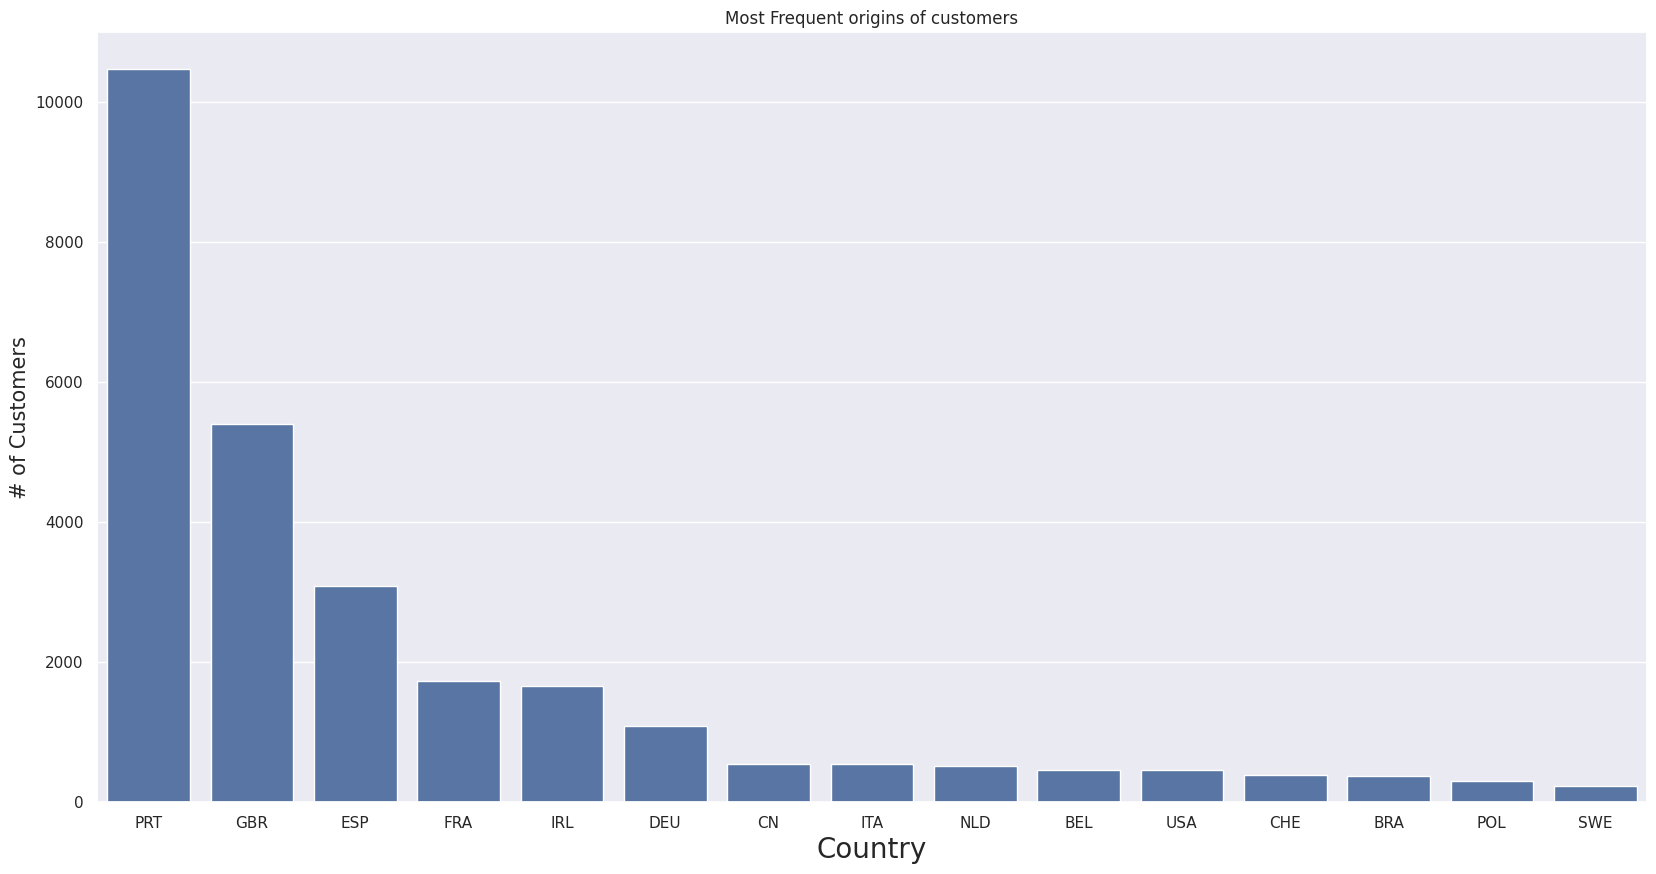

In [16]:
#top 10 countries

top_countries = df[(df['is_canceled'] == 0)]['country'].value_counts().reset_index()
top_countries.columns =['Country','Customer_Count']
top_countries = top_countries[:15]
top_countries
sns.barplot( data=top_countries, x=top_countries.Country, y=top_countries.Customer_Count)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Country', fontsize=20)
plt.ylabel('# of Customers', fontsize=15)
plt.title("Most Frequent origins of customers")
;

Insight:

Both hotels are in Portugal which is the reason the majority of their customers are from Portugal.

In [17]:
top_countries

,Country,Customer_Count
0,PRT,10476
1,GBR,5402
2,ESP,3090
3,FRA,1727
4,IRL,1656
5,DEU,1084
6,CN,546
7,ITA,541
8,NLD,523
9,BEL,467


Most Frequent origins of customers by hotel

In [18]:
#create temp df for customers who didn't cancel
temp = df[(df['is_canceled']==0)]

In [20]:
#Create list for top 15 countries for simplicity
top_countries_list=top_countries.Country.unique()
top_countries_list

array(['PRT', 'GBR', 'ESP', 'FRA', 'IRL', 'DEU', 'CN', 'ITA', 'NLD',
       'BEL', 'USA', 'CHE', 'BRA', 'POL', 'SWE'], dtype=object)

In [21]:
#This df holds only country values that are in the top_countries_list
Origins_by_HotelType = temp[temp['country'].isin(top_countries_list)]

Text(0.5, 1.0, 'Most Frequent origins of customers by hotel')

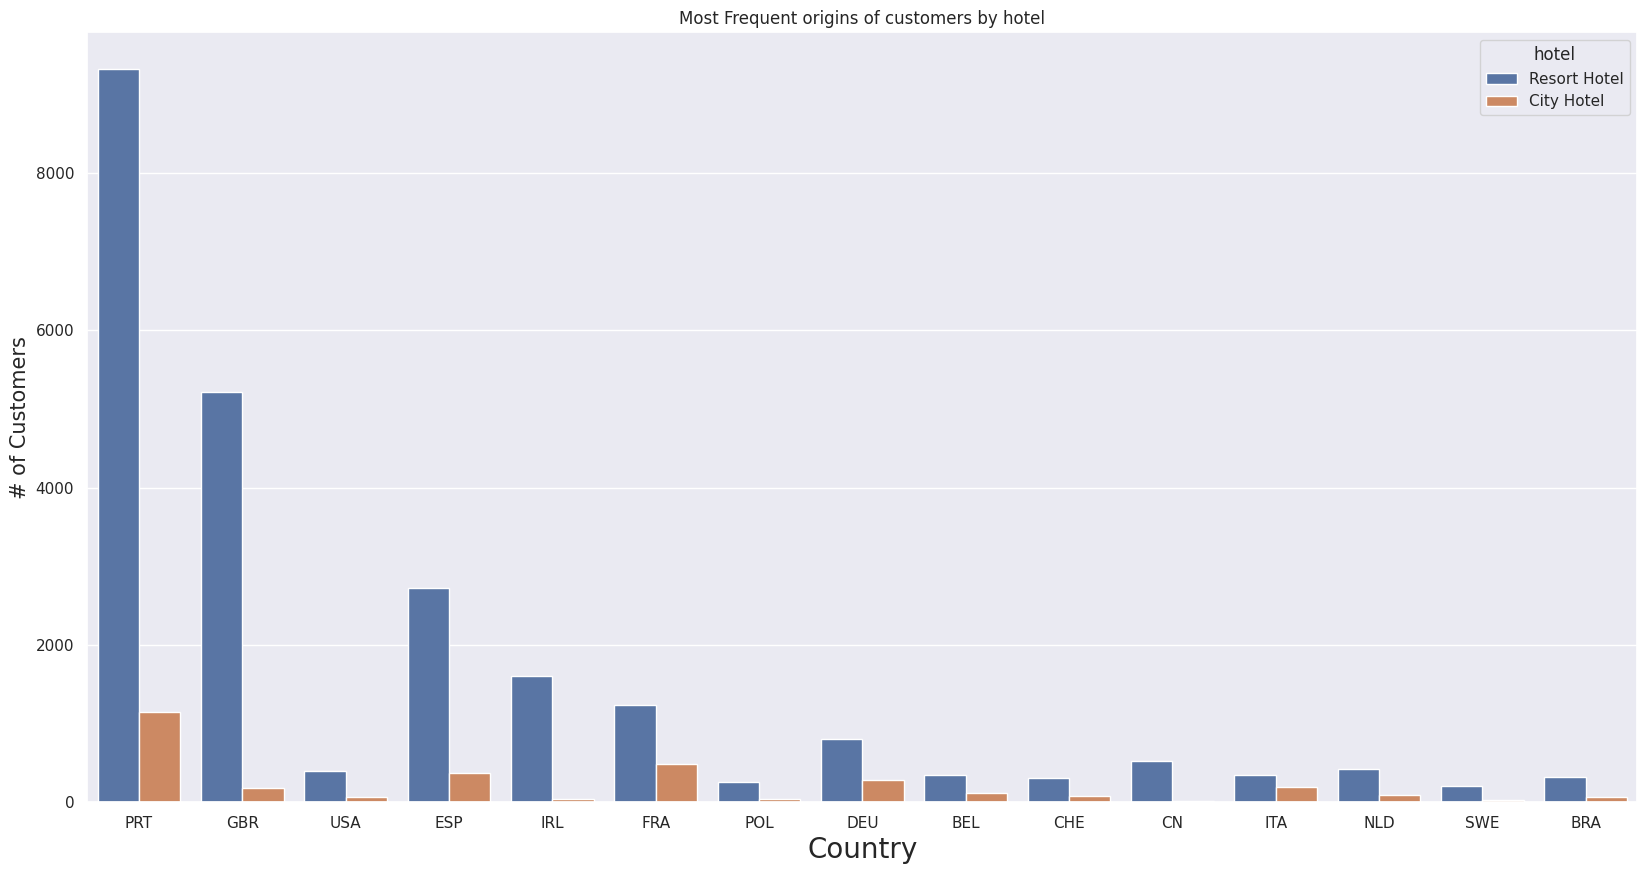

In [22]:
sns.countplot(x ='country',hue='hotel', data = Origins_by_HotelType)
sns.set(rc = {'figure.figsize':(20,10)})
plt.xlabel('Country', fontsize=20)
plt.ylabel('# of Customers', fontsize=15)
plt.title("Most Frequent origins of customers by hotel")

Insight: A good amount of the city hotel's customers are from France and Germany, unlike the Resort hotel. This could be because the city hotel is presumably used for more business-related travelers.

Basic Comparison of City and Resort Hotels

Average Daily Rate



In [23]:
df[(df['is_canceled']==0)].groupby('hotel')['adr'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,3717.0,86.812015,31.501765,0.00,71.0,85.28,100.3,318.5
Resort Hotel,25566.0,93.508042,60.819528,-6.38,49.0,75.00,123.5,508.0


Insight: City hotel guests pay a slighty higher daily rate, on average.

Total Stay

In [24]:
df[(df['is_canceled']==0)].groupby('hotel')['total_stay'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,3717.0,3.152004,1.977206,0.0,2.0,3.0,4.0,48.0
Resort Hotel,25566.0,4.228546,3.403255,0.0,2.0,3.0,7.0,56.0


Insight: It is typical for guests to stay longer at the resort hotel, on average. This is probably because the resort hotel is used typically for vacations, in speculation.

Family Size

In [25]:
df[(df['is_canceled']==0)].groupby('hotel')['total_family_size'].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,3717.0,1.900457,0.635590,0.0,2.0,2.0,2.0,12.0
Resort Hotel,25566.0,1.985606,0.675887,0.0,2.0,2.0,2.0,5.0


Inisght: No difference in family size per reservation between hotels.

In [ ]:
#To add - heatmap split by hotel
#cancellation stats

Popular Rooms by Hotel(Number of stays)

In [26]:
popular_rooms=df[(df['is_canceled']==0)].groupby(['reserved_room_type','hotel']).size().unstack()
popular_rooms

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,3071.0,14371.0
B,193.0,3.0
C,1.0,609.0
D,318.0,5047.0
E,29.0,3353.0
F,103.0,886.0
G,2.0,940.0
H,NaN,353.0
L,NaN,4.0


Insight:Room A was the most popular for both hotels, while each hotel had varying unpopular rooms. This data could also be atrributed to number of rooms per type and availability.

Text(0.5, 1.0, 'Popular Rooms by Hotel(Number of stays)')

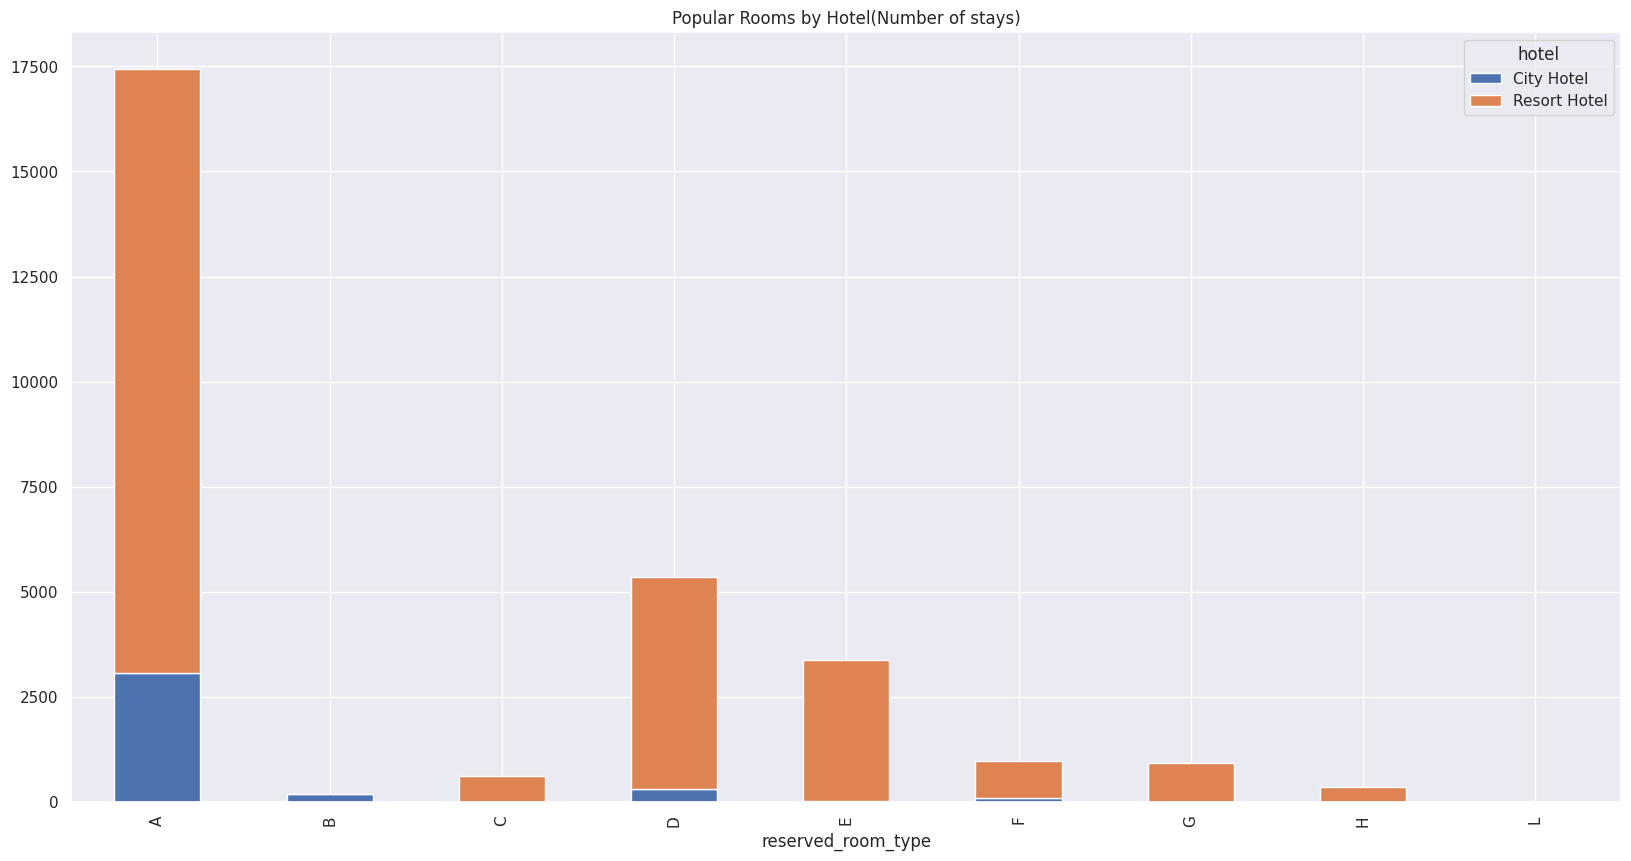

In [27]:
popular_rooms.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Popular Rooms by Hotel(Number of stays)")

Insight: Similar demand for rooms between hotels

Most expensive rooms at each hotel

In [28]:
Average_Room_Prices=df[(df['is_canceled']==0)].groupby(['reserved_room_type','hotel'])['adr'].mean().unstack()
Average_Room_Prices

hotel,City Hotel,Resort Hotel
reserved_room_type,,
A,84.162602,75.448693
B,75.113575,104.666667
C,65.000000,154.899934
D,96.158113,101.286729
E,82.873448,110.077304
F,158.316796,130.060621
G,183.375000,161.174021
H,NaN,181.531898
L,NaN,151.000000


Insight: Based on the data, room A is the cheapest for both hotels, which probably explains why it is the most popular. While, rooms like G and F are more expensive which probably explains why they are stayed at less than A.

Text(0.5, 1.0, 'Most expensive rooms at each hotel')

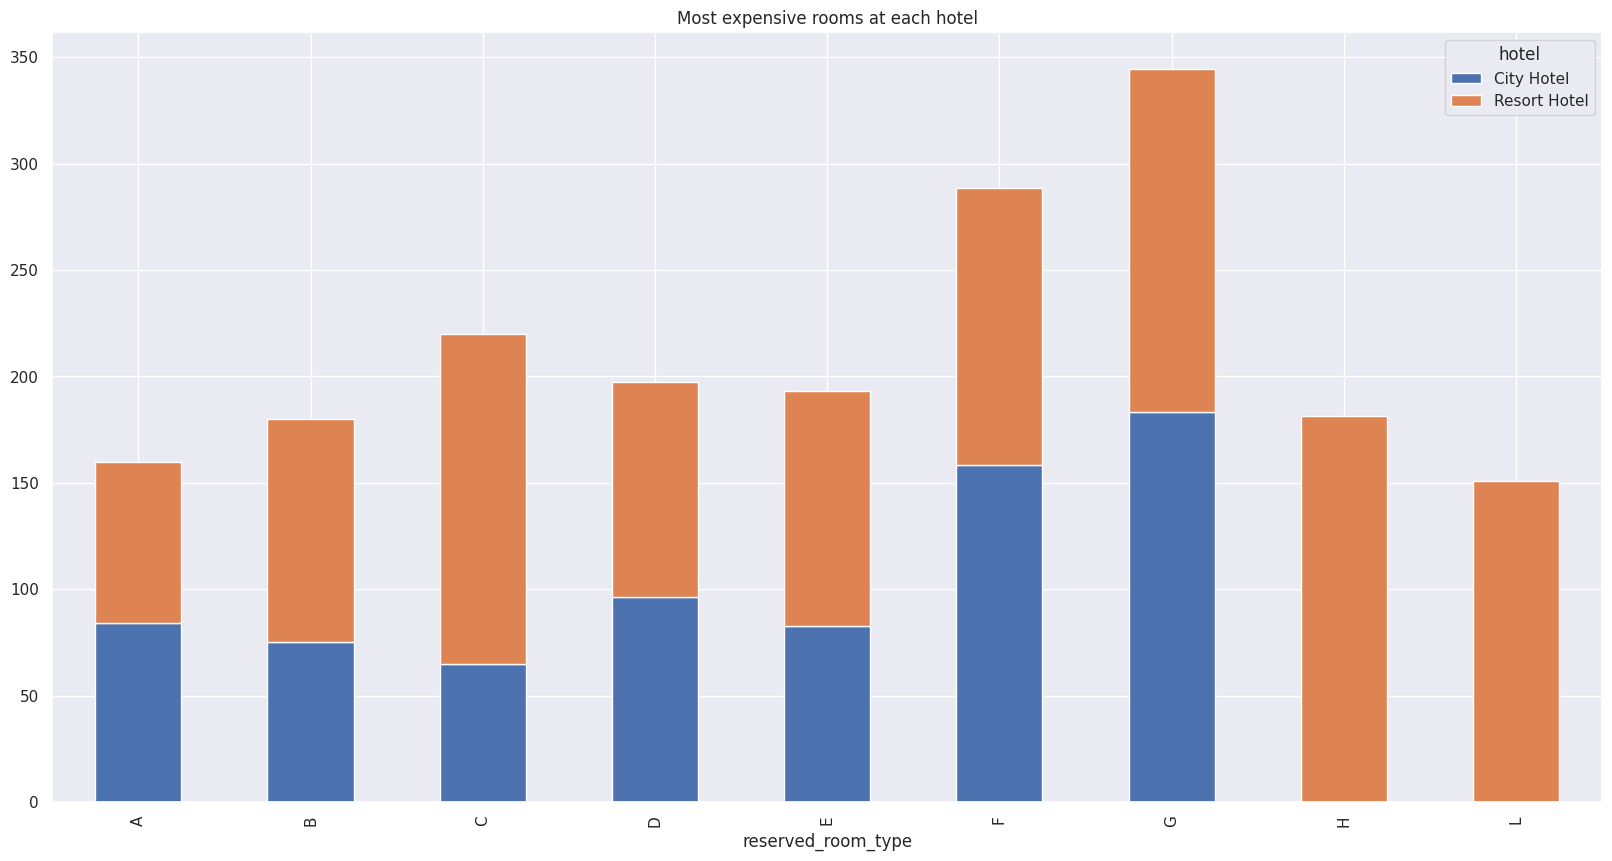

In [29]:
Average_Room_Prices.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title("Most expensive rooms at each hotel")

Insights: For the city hotel, room 'G' is most expensive on average, while room 'H' is most expenseive for the resort hotel.

**Cancellation Analysis**

Which customers were most likely to cance;(based on country)

In [30]:
#First I find the top 15 most frequent custmer origins to make findings more useful to the hotels. Then create a new df.
Most_Frequent_Origins = df['country'].value_counts().reset_index()
Most_Frequent_Origins.columns =['Country','Customer_Count']
Most_Frequent_Origins = Most_Frequent_Origins[:15]
Most_Frequent_Origins_List = Most_Frequent_Origins.Country.unique()
Most_Frequent_Origins_DF = df[df['country'].isin(Most_Frequent_Origins_List)]
Most_Frequent_Origins_DF

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_family_size,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74034,City Hotel,1,307,2015,August,34,20,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2
74054,City Hotel,1,314,2015,August,35,27,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2
74074,City Hotel,1,321,2015,September,36,3,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2
74094,City Hotel,1,328,2015,September,37,10,0,2,2,...,Non Refund,0,Contract,62.0,0.0,0.0,Canceled,2015-01-01,2,2


In [31]:
#Then I find % of cancellations grouped by country
Cancellations_By_Country = round(Most_Frequent_Origins_DF.groupby('country')['is_canceled'].value_counts(normalize=True)*100,2).unstack()
Cancellations_By_Country

is_canceled,0,1
country,,
BEL,53.19,46.81
BRA,34.42,65.58
CHE,50.45,49.55
CHN,22.53,77.47
CN,70.82,29.18
DEU,50.77,49.23
ESP,62.46,37.54
FRA,50.03,49.97
GBR,73.16,26.84


Insight:Guests from Brazil, Italy, Portugal are most likely to cancel their reservations. While guests from Austria, Belgium, Germany, France, Netherlands, and the Untied Kingdom are least likely to cancel.

Which resort experiences the most cancellations?

In [32]:
Resort_Type_Cancellations = round(df.groupby('hotel')['is_canceled'].value_counts(normalize=True)*100,2)
Resort_Type_Cancellations

hotel         is_canceled
City Hotel    1              80.24
              0              19.76
Resort Hotel  0              76.29
              1              23.71
Name: proportion, dtype: float64

Insight: Guests who book stays at the city hotel are about 7% more likely to cancel than guests who book stays at the resort hotel.

Corr Heatmap

<Axes: >

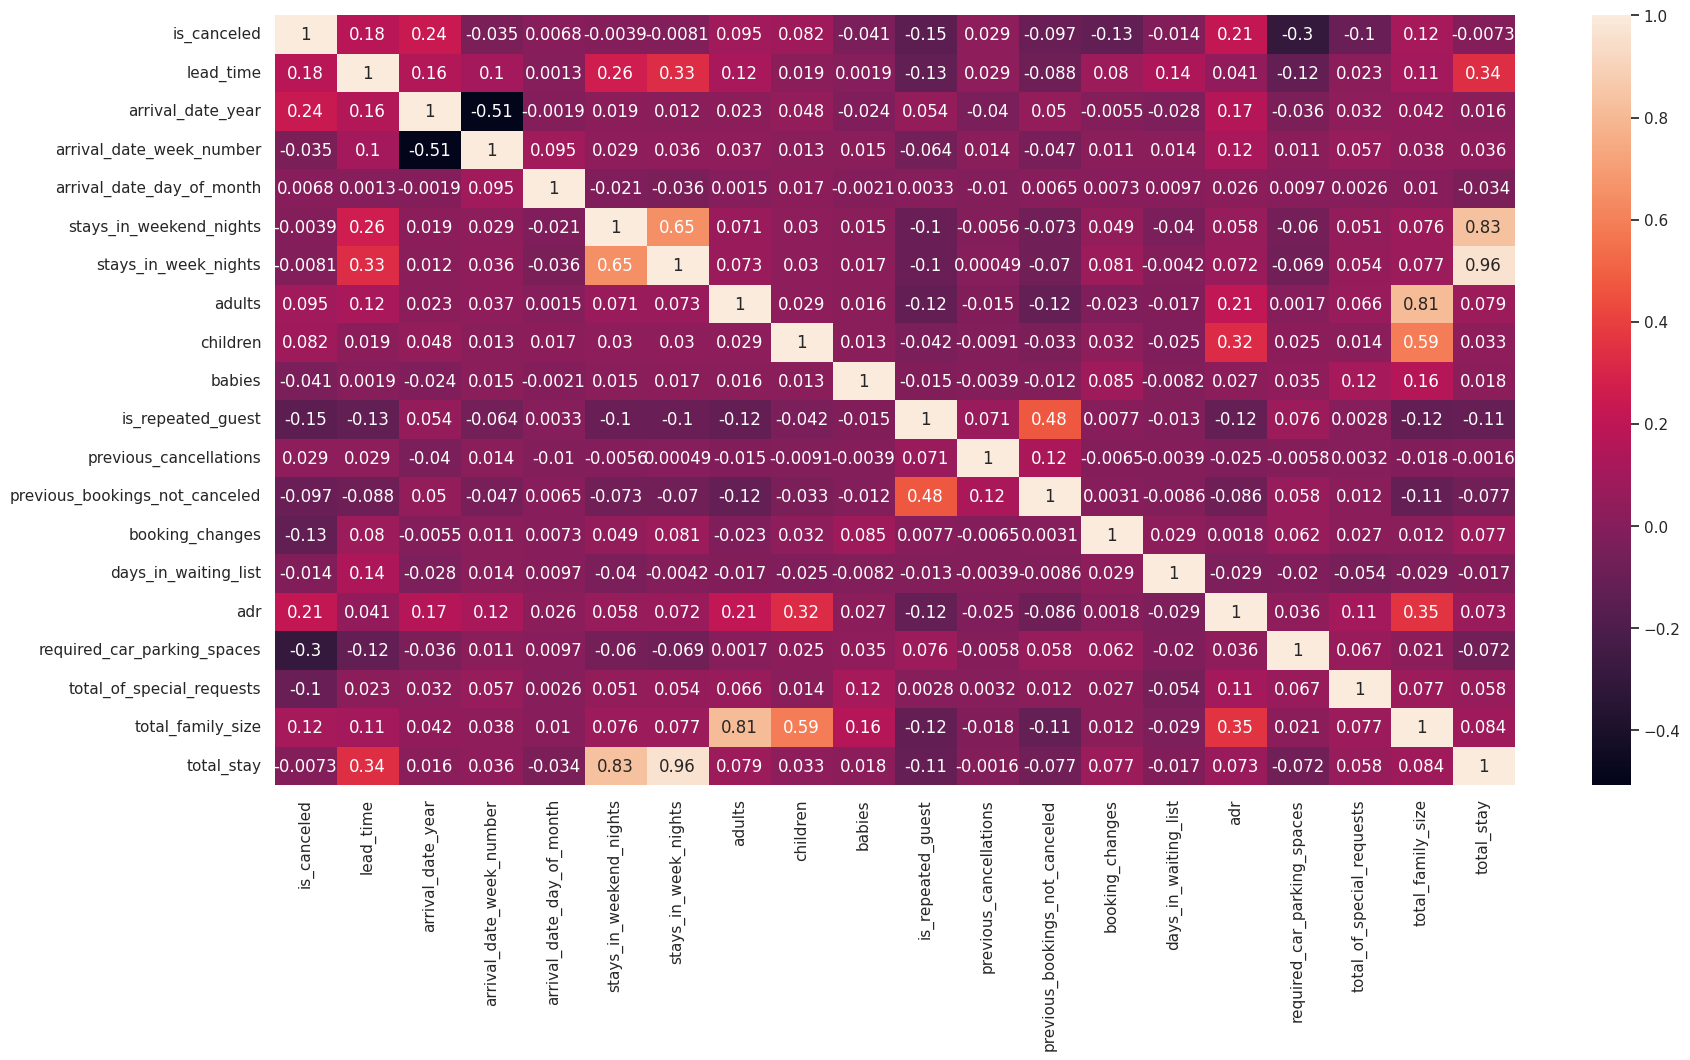

In [34]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)

Corr of all varriables with 'is_canceled'

In [39]:
# Convert the 'arrival_date_month' column to numerical representation using label encoding.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['arrival_date_month'] = le.fit_transform(df['arrival_date_month'])

# Now calculate the correlations
correlations = df.select_dtypes(include=np.number).corr()['is_canceled'].sort_values(ascending=False)
print(correlations)

is_canceled                       1.000000
arrival_date_year                 0.235063
adr                               0.213798
lead_time                         0.175768
total_family_size                 0.115948
adults                            0.095271
children                          0.081730
previous_cancellations            0.029260
arrival_date_day_of_month         0.006782
stays_in_weekend_nights          -0.003918
total_stay                       -0.007318
stays_in_week_nights             -0.008087
days_in_waiting_list             -0.014399
arrival_date_week_number         -0.035316
babies                           -0.041238
arrival_date_month               -0.057642
previous_bookings_not_canceled   -0.096703
total_of_special_requests        -0.100061
booking_changes                  -0.127961
is_repeated_guest                -0.145119
required_car_parking_spaces      -0.299341
Name: is_canceled, dtype: float64


##Removing useless variables/ Feature Selection and engineering

In [40]:
df.drop(['arrival_date_week_number','days_in_waiting_list', 'arrival_date_year'], axis=1, inplace=True)

In [41]:
df.drop(['arrival_date_month'], axis=1, inplace=True)
df.drop(['arrival_date_day_of_month'], axis=1, inplace=True)
df.drop(['reservation_status'], axis=1, inplace=True)
df.drop(['assigned_room_type'], axis=1, inplace=True)
print(df.columns)

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'total_family_size', 'total_stay',
       'hotel_City Hotel', 'hotel_Resort Hotel'],
      dtype='object')


In [42]:
#Splitting reservation_status_date for easier manipulation

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

In [43]:
df.drop(['reservation_status_date'], axis=1, inplace=True)
df.dtypes

,0
is_canceled,int64
lead_time,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,int64
babies,int64
meal,object
country,object
market_segment,object


In [44]:
#Minimizing the # of unique values in the country column which will be beneficial when creating dummy vars
df['country'].nunique()
df.loc[~df["country"].isin(top_countries_list), "country"] = "Other"
df['country'].value_counts()
df['country'].nunique()

16

In [45]:
df['deposit_type'].nunique()
df['meal'].nunique()
df['customer_type'].nunique()
df['reserved_room_type'].nunique()

10

Creating Dummy Variables for Required Variables

In [46]:
df.dtypes

,0
is_canceled,int64
lead_time,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,int64
babies,int64
meal,object
country,object
market_segment,object


In [57]:
# Create dummy variables for categorical columns
categorical_cols = [ 'market_segment', 'distribution_channel',
                   'country', 'reserved_room_type', 'deposit_type', 'customer_type',
                   'meal']  # Add other categorical columns as needed

#Check to ensure specified columns are present in df
for col in categorical_cols:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in DataFrame")

dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
dummies

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,meal_FB,meal_HB,meal_SC,meal_Undefined
0,0,342,0,0,2,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
1,0,737,0,0,2,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
2,0,7,0,1,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,13,0,1,1,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
4,0,14,0,2,2,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74034,1,307,0,2,2,0,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
74054,1,314,0,2,2,0,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
74074,1,321,0,2,2,0,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False
74094,1,328,0,2,2,0,0,0,1,0,...,False,True,False,False,False,False,False,False,False,False


checking variance of numeric data to see if we need to normalize values

In [59]:
#Convert columns with object/string data types to numeric type before calculating the variance
numeric_df = df.select_dtypes(include=np.number)  #select columns with numeric data types and create new dataframe
variances = numeric_df.var().sort_values(ascending=False)
print(variances.head(30)) # Print top 30 variances

lead_time                         8183.024933
adr                               3778.642680
day                                 77.137921
month                               10.897898
total_stay                           9.725346
stays_in_week_nights                 5.227976
stays_in_weekend_nights              1.220766
total_family_size                    0.709942
previous_bookings_not_canceled       0.664015
total_of_special_requests            0.648047
booking_changes                      0.546316
year                                 0.491894
adults                               0.445228
is_canceled                          0.246442
children                             0.228131
required_car_parking_spaces          0.097482
previous_cancellations               0.094036
is_repeated_guest                    0.031705
babies                               0.014184
dtype: float64


In [60]:
#normalize_columns =['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests']
normalized_df =df.loc[:, ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests']]

Normalizing Numeric Columns

In [61]:
final_normalized_df= (normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())
final_normalized_df

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,0.464043,0.0,0.000,0.036364,0.0,0.0,0.000000,0.0,0.15,0.001180,0.0,0.0
1,1.000000,0.0,0.000,0.036364,0.0,0.0,0.000000,0.0,0.20,0.001180,0.0,0.0
2,0.009498,0.0,0.025,0.018182,0.0,0.0,0.000000,0.0,0.00,0.015053,0.0,0.0
3,0.017639,0.0,0.025,0.018182,0.0,0.0,0.000000,0.0,0.00,0.015053,0.0,0.0
4,0.018996,0.0,0.050,0.036364,0.0,0.0,0.000000,0.0,0.00,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
74034,0.416554,0.0,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0
74054,0.426052,0.0,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0
74074,0.435550,0.0,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0
74094,0.445047,0.0,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0


In [62]:
Final_df = pd.merge(dummies,final_normalized_df , left_index=True, right_index=True)
Final_df

,is_canceled,lead_time_x,stays_in_weekend_nights_x,stays_in_week_nights_x,adults_x,children_x,babies_x,is_repeated_guest,previous_cancellations_x,previous_bookings_not_canceled_x,...,stays_in_week_nights_y,adults_y,children_y,babies_y,previous_cancellations_y,previous_bookings_not_canceled_y,booking_changes_y,adr_y,required_car_parking_spaces_y,total_of_special_requests_y
0,0,342,0,0,2,0,0,0,0,0,...,0.000,0.036364,0.0,0.0,0.000000,0.0,0.15,0.001180,0.0,0.0
1,0,737,0,0,2,0,0,0,0,0,...,0.000,0.036364,0.0,0.0,0.000000,0.0,0.20,0.001180,0.0,0.0
2,0,7,0,1,1,0,0,0,0,0,...,0.025,0.018182,0.0,0.0,0.000000,0.0,0.00,0.015053,0.0,0.0
3,0,13,0,1,1,0,0,0,0,0,...,0.025,0.018182,0.0,0.0,0.000000,0.0,0.00,0.015053,0.0,0.0
4,0,14,0,2,2,0,0,0,0,0,...,0.050,0.036364,0.0,0.0,0.000000,0.0,0.00,0.019307,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74034,1,307,0,2,2,0,0,0,1,0,...,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0
74054,1,314,0,2,2,0,0,0,1,0,...,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0
74074,1,321,0,2,2,0,0,0,1,0,...,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0
74094,1,328,0,2,2,0,0,0,1,0,...,0.050,0.036364,0.0,0.0,0.038462,0.0,0.00,0.012648,0.0,0.0


##Logistic Regression Model

In [63]:
#defining independent, dependent data sets

Y= Final_df['is_canceled']
X = Final_df.drop(['is_canceled'], axis=1)

In [64]:
#creating train/test sets

from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, Y, test_size = 0.3)

In [66]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ... (Your existing code to create Final_df, X, and Y) ...

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
x_training_data_imputed = imputer.fit_transform(x_training_data)
x_test_data_imputed = imputer.transform(x_test_data)


model = LogisticRegression(max_iter=10000)
model.fit(x_training_data_imputed, y_training_data)  # Use imputed data
predictions = model.predict(x_test_data_imputed)    # Use imputed data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8802
           1       0.84      0.82      0.83      6894

    accuracy                           0.85     15696
   macro avg       0.85      0.85      0.85     15696
weighted avg       0.85      0.85      0.85     15696



**The model was 85% accurate in predicting if a customer will cancel their reservation.**

**In the process of refining model**